In [3]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model("../models/saved_models/face_mask_detection_model.h5")

print("Model loaded successfully!")

Model loaded successfully!


In [4]:
import numpy as np
# Example: Loading the saved data
X_train_loaded = np.load('../dataset/processed/X_train.npy')
X_test_loaded = np.load('../dataset/processed/X_test.npy')
Y_train_loaded = np.load('../dataset/processed/y_train.npy')
Y_test_loaded = np.load('../dataset/processed/y_test.npy')

print("Data loaded successfully!")

Data loaded successfully!


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define the improved CNN model
improved_model = Sequential([
    # Convolutional Layer 1
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    # Convolutional Layer 2
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    # Convolutional Layer 3
    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),  # Prevent overfitting

    # Convolutional Layer 4
    Conv2D(256, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.3),

    # Fully Connected Layers
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(2, activation='softmax')  # Output Layer
])

# Compile the model with Adam optimizer
improved_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
improved_model.summary()

c:\Developer\face_mask\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,719,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,112,514 (19.50 MB)

 Trainable params: 5,110,530 (19.50 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,  
    rotation_range=30,  
    width_shift_range=0.2,  
    height_shift_range=0.2,  
    shear_range=0.2,  
    zoom_range=0.2,  
    horizontal_flip=True,  
    fill_mode='nearest'  
)

In [7]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

In [8]:
history = improved_model.fit(
    datagen.flow(X_train_loaded, Y_train_loaded, batch_size=32),
    validation_data=(X_test_loaded, Y_test_loaded),
    epochs=30,
    callbacks=[lr_scheduler],  # Apply learning rate scheduling
    verbose=1
)

c:\Developer\face_mask\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 48s 240ms/step - accuracy: 0.7312 - loss: 0.8438 - val_accuracy: 0.5050 - val_loss: 3.0905 - learning_rate: 0.0010
Epoch 2/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 41s 219ms/step - accuracy: 0.8293 - loss: 0.3971 - val_accuracy: 0.5473 - val_loss: 5.2839 - learning_rate: 0.0010
Epoch 3/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 44s 230ms/step - accuracy: 0.8714 - loss: 0.3082 - val_accuracy: 0.7704 - val_loss: 6.3641 - learning_rate: 0.0010
Epoch 4/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - accuracy: 0.9001 - loss: 0.2546
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
189/189 ━━━━━━━━━━━━━━━━━━━━ 46s 245ms/step - accuracy: 0.9001 - loss: 0.2546 - val_accuracy: 0.5149 - val_loss: 163.8800 - learning_rate: 0.0010
Epoch 5/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 41s 216ms/step - accuracy: 0.9137 - loss: 0.2088 - val_accuracy: 0.5122 - val_loss: 109.3860 - learning_rate: 5.0000e-04
Epoch 6/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 40s 212ms/step - accurac

# Ploting Training Accuracy & Loss

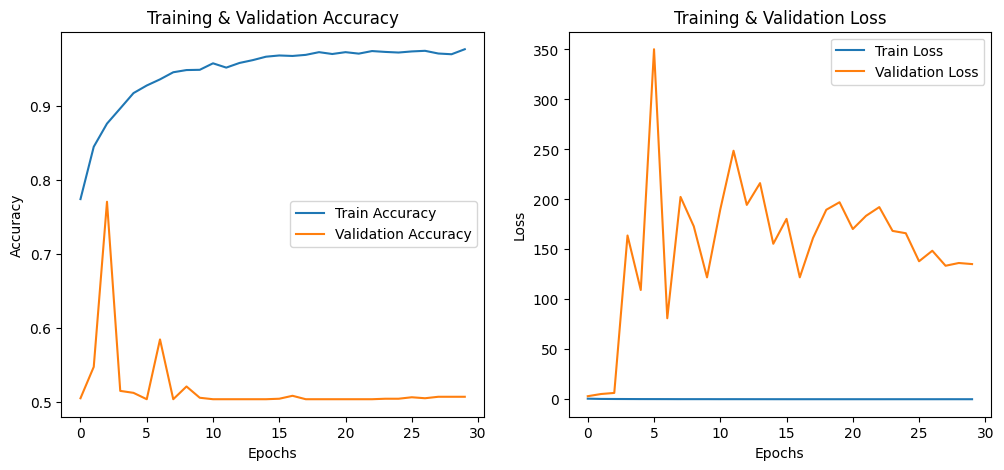

In [9]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')

plt.show()

# Evaluating Precision, Recall, & F1-Score

In [21]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report

# Get model predictions
y_pred = improved_model.predict(X_test_loaded)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(Y_test_loaded, axis=1)

# Print classification report
class_report = classification_report(y_true, y_pred_classes, target_names=["With Mask", "Without Mask"])
print(class_report)

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step
              precision    recall  f1-score   support

   With Mask       0.51      1.00      0.67       761
Without Mask       1.00      0.01      0.01       750

    accuracy                           0.51      1511
   macro avg       0.75      0.50      0.34      1511
weighted avg       0.75      0.51      0.34      1511



# Save the trained model in H5 format

In [23]:
model.save("../models/saved_models/face_mask_detection_improved_model.h5")

print("Model saved successfully!")

Model saved successfully!
